<a href="https://colab.research.google.com/github/elfkr7/Applied-Multivariate-Statistics-Project/blob/main/TNBC_QNBC_EfficientNetB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#torch
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split
from torchvision import models

#libs
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import sys
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from PIL import Image
Image.MAX_IMAGE_PIXELS = None


In [ ]:
#download TNBC
!wget -O data1.zip https://www.dropbox.com/sh/vigzxmgygj5jt4m/AABqnsGfC_p6wjv3H8SxbSoka?dl=0


--2022-07-23 20:00:50--  https://www.dropbox.com/sh/vigzxmgygj5jt4m/AABqnsGfC_p6wjv3H8SxbSoka?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/vigzxmgygj5jt4m/AABqnsGfC_p6wjv3H8SxbSoka [following]
--2022-07-23 20:00:50--  https://www.dropbox.com/sh/raw/vigzxmgygj5jt4m/AABqnsGfC_p6wjv3H8SxbSoka
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce82e12cea151ca2d48debaa1a0.dl.dropboxusercontent.com/zip_download_get/BNACwfz2d_lXSQHq4ldpDUV0DB_oAdylCMTeg4MnHy673o3_Q0AshOFXPSJ9n1tAW83lOlvEokRLcb8VDka0Qkl2tZeJ0zDhednsfol3bXPYeA# [following]
--2022-07-23 20:00:51--  https://uce82e12cea151ca2d48debaa1a0.dl.dropboxusercontent.com/zip_download_get/BNACwfz2d_lXSQHq4ldpDUV0DB_oAdylCMTeg4MnHy673o3_Q0AshOFXPSJ9n1tAW83lOlvEokRLcb8V

In [ ]:
!unzip data1.zip -x / -d data/TNBC

Archive:  data1.zip
 extracting: data/TNBC/SUS99___2021_07_16_02.31.18  
 extracting: data/TNBC/SUS96___2021_07_16_02.15.08  
 extracting: data/TNBC/SUS95___2021_07_16_02.06.54  
 extracting: data/TNBC/SUS78___2021_07_16_01.09.32  
 extracting: data/TNBC/SUS76___2021_07_16_00.57.07  
 extracting: data/TNBC/SUS72___2021_07_16_00.22.44  
 extracting: data/TNBC/SUS67___2021_07_15_23.51.11  
 extracting: data/TNBC/SUS66___2021_07_15_23.40.57  
 extracting: data/TNBC/SUS65___2021_06_17_12.12.01  
 extracting: data/TNBC/SUS64___2021_07_15_23.32.13  
 extracting: data/TNBC/SUS62___2021_07_15_23.08.59  
 extracting: data/TNBC/SUS52___2021_07_15_22.02.37  
 extracting: data/TNBC/SUS51___2021_07_15_21.52.24  
 extracting: data/TNBC/SUS48___2021_07_15_21.41.06  
 extracting: data/TNBC/SUS35___2021_06_17_12.01.28  
 extracting: data/TNBC/SUS24___2021_07_15_20.10.33  
 extracting: data/TNBC/SUS23___2021_07_15_19.54.29  
 extracting: data/TNBC/SUS20___2021_07_15_19.46.27  
 extracting: data/TNBC/SUS

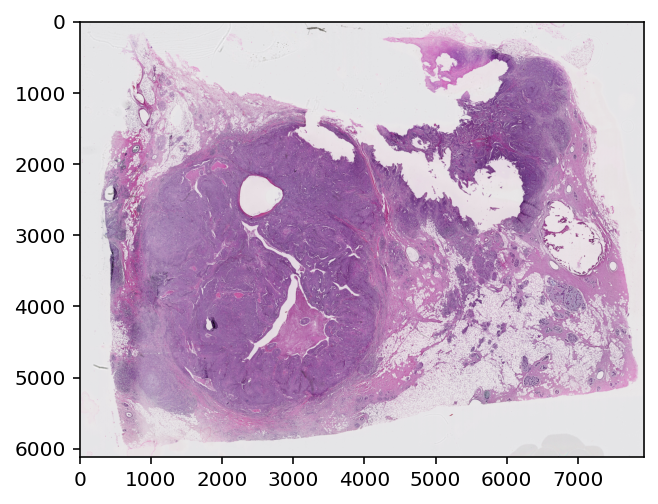

In [ ]:
img = plt.imread('data/TNBC/SUS119___2021_07_16_03.41.29')
plt.imshow(img)

In [ ]:
!rm data1.zip

In [ ]:
#download QNBC
!wget -O data2.zip https://www.dropbox.com/sh/gcl439gffczegmx/AADMKjEA6JrLu8G2Mm1ktkP_a?dl=0


--2022-07-23 20:01:52--  https://www.dropbox.com/sh/gcl439gffczegmx/AADMKjEA6JrLu8G2Mm1ktkP_a?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/gcl439gffczegmx/AADMKjEA6JrLu8G2Mm1ktkP_a [following]
--2022-07-23 20:01:52--  https://www.dropbox.com/sh/raw/gcl439gffczegmx/AADMKjEA6JrLu8G2Mm1ktkP_a
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c719e3e6eca2f7d4bf315fccf.dl.dropboxusercontent.com/zip_download_get/BNBN14LNzXAVxddcL__2wKz8RHvWwxY0SxYTuai74DNcMeCFVGyev05HUulxg_azp3DPWu7XLQivywmS37q8uSZoHX84zpNVLMzq3NboF8T0wA# [following]
--2022-07-23 20:01:53--  https://uc3c719e3e6eca2f7d4bf315fccf.dl.dropboxusercontent.com/zip_download_get/BNBN14LNzXAVxddcL__2wKz8RHvWwxY0SxYTuai74DNcMeCFVGyev05HUulxg_azp3DPWu7XLQivywmS

In [ ]:
!unzip data2.zip -x / -d data/QNBC

Archive:  data2.zip
 extracting: data/QNBC/SUS98___2021_07_16_02.21.43  
 extracting: data/QNBC/SUS94___2021_07_16_01.58.48  
 extracting: data/QNBC/SUS92___2021_07_16_01.52.18  
 extracting: data/QNBC/SUS87___2021_07_16_01.45.16  
 extracting: data/QNBC/SUS84___2021_07_16_01.34.23  
 extracting: data/QNBC/SUS82___2021_07_16_01.23.07  
 extracting: data/QNBC/SUS79___2021_07_16_01.14.39  
 extracting: data/QNBC/SUS74___2021_07_16_00.44.36  
 extracting: data/QNBC/SUS73___2021_07_16_00.32.06  
 extracting: data/QNBC/SUS71___2021_07_16_00.14.41  
 extracting: data/QNBC/SUS70___2021_07_16_00.07.57  
 extracting: data/QNBC/SUS68___2021_07_15_23.59.25  
 extracting: data/QNBC/SUS63___2021_07_15_23.22.44  
 extracting: data/QNBC/SUS61___2021_07_15_22.58.01  
 extracting: data/QNBC/SUS58___2021_07_15_22.50.21  
 extracting: data/QNBC/SUS56___2021_07_15_22.25.32  
 extracting: data/QNBC/SUS54___2021_07_15_22.19.37  
 extracting: data/QNBC/SUS53___2021_07_15_22.15.00  
 extracting: data/QNBC/SUS

In [ ]:
!rm data2.zip

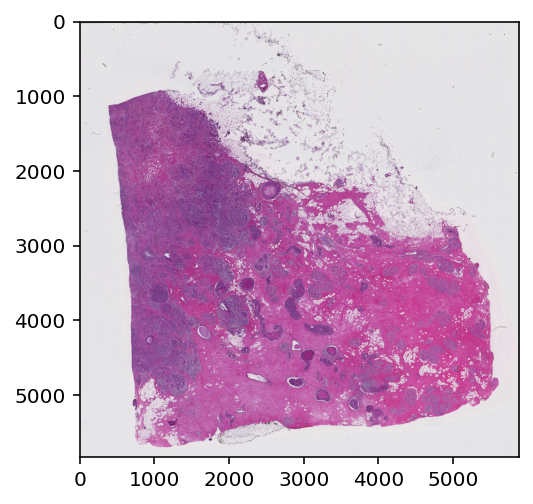

In [ ]:
img2 = plt.imread('data/QNBC/SUS98___2021_07_16_02.21.43')
plt.imshow(img2)

In [ ]:
!find data/TNBC -type f -exec mv '{}' '{}'.tiff \;
!find data/QNBC -type f -exec mv '{}' '{}'.tiff \;

In [ ]:
#data_dir = './data/'
# = os.listdir(data_dir)
classes=['QNBC', 'TNBC']
print(classes)


['QNBC', 'TNBC']


In [ ]:
classes=classes[1:3]
print(classes)

In [ ]:
#check the number of the classes
print(len(classes))

In [ ]:
import shutil

shutil.rmtree('./output')

In [ ]:
from itertools import filterfalse
dir_path = r'./data/QNBC/'

# list file and directories
res_QNBC = os.listdir(dir_path)
print(res_QNBC)

dir_path = r'./data/TNBC/'

# list file and directories
res_TNBC = os.listdir(dir_path)
print(res_TNBC)
a=['SUS144___2021_07_16_06.39.52.tiff', 'SUS161___2021_06_17_12.35.34.tiff', 'SUS25___2021_07_15_20.19.20.tiff', 'SUS26___2021_07_15_20.24.21.tiff', 'SUS27___2021_07_15_20.27.46.tiff', 'SUS30___2021_07_15_20.39.00.tiff', 'SUS58___2021_07_15_22.50.21.tiff', 'SUS82___2021_07_16_01.23.07.tiff'] + ['SUS43___2021_07_15_21.16.08.tiff', 'SUS135___2021_07_16_05.32.47.tiff', 'SUS73___2021_07_16_00.32.06.tiff', 'SUS63___2021_07_15_23.22.44.tiff', 'SUS141___2021_07_16_06.17.49.tiff', 'SUS15___2021_07_15_18.58.21.tiff', 'SUS129___2021_07_16_04.39.53.tiff', 'SUS92___2021_07_16_01.52.18.tiff']+['SUS142___2021_07_16_06.24.50.tiff', 'SUS154___2021_07_16_07.35.48.tiff', 'SUS70___2021_07_16_00.07.57.tiff', 'SUS122___2021_07_16_03.54.45.tiff', 'SUS53___2021_07_15_22.15.00.tiff', 'SUS143___2021_07_16_06.32.15.tiff', 'SUS47___2021_07_15_21.34.45.tiff', 'SUS16___2021_07_15_19.06.32.tiff']
res_QNBC=list(filterfalse(a.__contains__, res_QNBC))
b=['SUS13___2021_07_15_18.45.27.tiff',
 'SUS159___2021_07_21_13.44.39.tiff',
 'SUS24___2021_07_15_20.10.33.tiff',
 'SUS35___2021_06_17_12.01.28.tiff',
 'SUS64___2021_07_15_23.32.13.tiff',
 'SUS72___2021_07_16_00.22.44.tiff',
 'SUS96___2021_07_16_02.15.08.tiff',
 'SUS99___2021_07_16_02.31.18.tiff'] + ['SUS52___2021_07_15_22.02.37.tiff', 'SUS149___2021_07_16_07.16.52.tiff', 'SUS130___2021_07_16_04.51.34.tiff', 'SUS78___2021_07_16_01.09.32.tiff', 'SUS23___2021_07_15_19.54.29.tiff', 'SUS65___2021_06_17_12.12.01.tiff', 'SUS126___2021_07_16_04.20.04.tiff', 'SUS111___2021_07_16_03.08.53.tiff'] + ['SUS95___2021_07_16_02.06.54.tiff', 'SUS132___2021_07_16_05.14.06.tiff', 'SUS116___2021_07_16_03.21.02.tiff', 'SUS105___2021_07_16_02.38.09.tiff', 'SUS66___2021_07_15_23.40.57.tiff', 'SUS51___2021_07_15_21.52.24.tiff', 'SUS76___2021_07_16_00.57.07.tiff', 'SUS62___2021_07_15_23.08.59.tiff']
res_TNBC=list(filterfalse(b.__contains__, res_TNBC))
print(res_QNBC)
print(res_TNBC)

['SUS129___2021_07_16_04.39.53.tiff', 'SUS92___2021_07_16_01.52.18.tiff', 'SUS40___2021_07_15_21.02.20.tiff', 'SUS74___2021_07_16_00.44.36.tiff', 'SUS98___2021_07_16_02.21.43.tiff', 'SUS158___2021_07_16_14.59.47.tiff', 'SUS71___2021_07_16_00.14.41.tiff', 'SUS135___2021_07_16_05.32.47.tiff', 'SUS134___2021_07_16_05.22.32.tiff', 'SUS63___2021_07_15_23.22.44.tiff', 'SUS47___2021_07_15_21.34.45.tiff', 'SUS79___2021_07_16_01.14.39.tiff', 'SUS42___2021_07_15_21.12.57.tiff', 'SUS128___2021_07_16_04.27.23.tiff', 'SUS43___2021_07_15_21.16.08.tiff', 'SUS84___2021_07_16_01.34.23.tiff', 'SUS117___2021_07_16_03.33.05.tiff', 'SUS143___2021_07_16_06.32.15.tiff', 'SUS11___2021_07_15_18.26.59.tiff', 'SUS161___2021_06_17_12.35.34.tiff', 'SUS54___2021_07_15_22.19.37.tiff', 'SUS53___2021_07_15_22.15.00.tiff', 'SUS94___2021_07_16_01.58.48.tiff', 'SUS87___2021_07_16_01.45.16.tiff', 'SUS146___2021_07_16_07.01.39.tiff', 'SUS19___2021_07_15_19.33.44.tiff', 'SUS56___2021_07_15_22.25.32.tiff', 'SUS15___2021_07_1

In [ ]:
import random
random.sample(res_QNBC, 8)

['SUS79___2021_07_16_01.14.39.tiff',
 'SUS98___2021_07_16_02.21.43.tiff',
 'SUS40___2021_07_15_21.02.20.tiff',
 'SUS131___2021_07_16_05.03.42.tiff',
 'SUS18___2021_07_15_19.22.45.tiff',
 'SUS19___2021_07_15_19.33.44.tiff',
 'SUS137___2021_07_16_05.57.00.tiff',
 'SUS125___2021_07_16_04.08.26.tiff']

In [ ]:
res_TNBC[0:8]

['SUS157___2021_07_16_07.55.46.tiff',
 'SUS48___2021_07_15_21.41.06.tiff',
 'SUS119___2021_07_16_03.41.29.tiff',
 'SUS67___2021_07_15_23.51.11.tiff',
 'SUS108___2021_07_16_03.00.38.tiff',
 'SUS151___2021_07_16_07.26.07.tiff',
 'SUS20___2021_07_15_19.46.27.tiff',
 'SUS133___2021_06_17_12.46.16.tiff']

In [ ]:
import shutil
import random

source_folder = r"./data/QNBC/"
destination_folder = r"./val/QNBC/"
files_to_move = random.sample(res_QNBC, 8)
#files_to_move =['SUS142___2021_07_16_06.24.50.tiff', 'SUS154___2021_07_16_07.35.48.tiff', 'SUS70___2021_07_16_00.07.57.tiff', 'SUS122___2021_07_16_03.54.45.tiff', 'SUS53___2021_07_15_22.15.00.tiff', 'SUS143___2021_07_16_06.32.15.tiff', 'SUS47___2021_07_15_21.34.45.tiff', 'SUS16___2021_07_15_19.06.32.tiff']
# iterate files
for file in files_to_move:
    # construct full file path
    source = source_folder + file
    destination = destination_folder + file
    # move file
    shutil.move(source, destination)
    print('Moved:', file)

Moved: SUS138___2021_07_16_06.09.03.tiff
Moved: SUS11___2021_07_15_18.26.59.tiff
Moved: SUS54___2021_07_15_22.19.37.tiff
Moved: SUS79___2021_07_16_01.14.39.tiff
Moved: SUS61___2021_07_15_22.58.01.tiff
Moved: SUS94___2021_07_16_01.58.48.tiff
Moved: SUS139___2021_07_16_06.14.55.tiff
Moved: SUS68___2021_07_15_23.59.25.tiff


In [ ]:
source_folder = r"./data/TNBC/"
destination_folder = r"./val/TNBC/"
files_to_move = res_TNBC[0:8]
#files_to_move = ['SUS95___2021_07_16_02.06.54.tiff', 'SUS132___2021_07_16_05.14.06.tiff', 'SUS116___2021_07_16_03.21.02.tiff', 'SUS105___2021_07_16_02.38.09.tiff', 'SUS66___2021_07_15_23.40.57.tiff', 'SUS51___2021_07_15_21.52.24.tiff', 'SUS76___2021_07_16_00.57.07.tiff', 'SUS62___2021_07_15_23.08.59.tiff']
# iterate files
for file in files_to_move:
    # construct full file path
    source = source_folder + file
    destination = destination_folder + file
    # move file
    shutil.move(source, destination)
    print('Moved:', file)

Moved: SUS157___2021_07_16_07.55.46.tiff
Moved: SUS48___2021_07_15_21.41.06.tiff
Moved: SUS119___2021_07_16_03.41.29.tiff
Moved: SUS67___2021_07_15_23.51.11.tiff
Moved: SUS108___2021_07_16_03.00.38.tiff
Moved: SUS151___2021_07_16_07.26.07.tiff
Moved: SUS20___2021_07_15_19.46.27.tiff
Moved: SUS133___2021_06_17_12.46.16.tiff


In [ ]:
!pip -qq install split-folders tqdm

In [ ]:
#!pip install split-folders
import splitfolders
splitfolders.fixed('data', output="output", seed=17,fixed=0,group_prefix=None,oversample=True) 

Copying files: 92 files [00:51,  1.80 files/s]
Oversampling: 2 classes [00:11,  5.56s/ classes]


In [ ]:
import shutil

shutil.rmtree('./output/val/QNBC')
shutil.rmtree('./output/val/TNBC')

In [ ]:
shutil.rmtree('./output/val')

In [ ]:

print(len([name for name in os.listdir('./output/train/QNBC') if os.path.isfile(os.path.join('./output/train/QNBC', name))]))



52


In [ ]:
print(len([name for name in os.listdir('./output/train/TNBC') if os.path.isfile(os.path.join('./output/train/TNBC', name))]))

52


In [ ]:
print(len([name for name in os.listdir('./output/val/QNBC') if os.path.isfile(os.path.join('./output/val/QNBC', name))]))

8


In [ ]:
print(len([name for name in os.listdir('./output/val/TNBC') if os.path.isfile(os.path.join('./output/val/TNBC', name))]))

8


In [ ]:
#change the data_dir to output folder
data_dir = './output/'
data_dir

'./output/'

In [ ]:
from torch.utils.data import WeightedRandomSampler
sampler=list(WeightedRandomSampler([1.0,1.92], 96, replacement=True))

In [ ]:
#!pip install -U albumentations
from torchvision.transforms.transforms import Resize
#Data Augmentation
def get_data_loaders(data_dir, batch_size=32, train = False,data=False):

    if train:
        transform = transforms.Compose([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.5),
            transforms.RandomAutocontrast(p=0.5),
            #transforms.RandomEqualize(p=0.1),
            transforms.RandomRotation(90),
            #transforms.CenterCrop(7000),
            transforms.RandomApply(torch.nn.ModuleList([transforms.ColorJitter(),transforms.GaussianBlur(3)]), p=0.3),
            #transforms.Grayscale(num_output_channels=1),
            transforms.Resize((256,256)),
            transforms.CenterCrop(240),           
            #transforms.RandomCrop(1000),
            transforms.ToTensor()
            #,transforms.Normalize((0.5), (0.5))
            ,transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
            transforms.RandomErasing(p=0.3, value='random')
             ])
        train_data = datasets.ImageFolder(os.path.join(data_dir, "train/"), transform=transform)
        print(f"Found {len(train_data)} images for training with {len(train_data.classes)} classes")
        train_loader = DataLoader(train_data, batch_size=batch_size,shuffle=True, num_workers=4, pin_memory=True)
        return train_loader, len(train_data)
    
    else:
        transform = transforms.Compose([
            #transforms.RandomCrop(1000),
            transforms.Resize((256,256)),
            transforms.CenterCrop(246),
            transforms.ToTensor()
            #transforms.CenterCrop(7000),
             #transforms.Grayscale(num_output_channels=1)
             #,transforms.Normalize((0.5), (0.5))
             ,transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                     ])
        if data:
          test_data = datasets.ImageFolder(os.path.join("./data/", ""), transform=transform)
          print(f"Found {len(test_data)} images for testing with {len(test_data.classes)} classes")
          test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=2)
        #return (val_loader, test_loader, len(val_data), len(test_data))
       
          return (test_loader, len(test_data))
        else:
          val_data = datasets.ImageFolder(os.path.join(data_dir, "val/"), transform=transform)
          val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
          print(f"Found {len(val_data)} images for validation with {len(val_data.classes)} classes")
          return (val_loader, len(val_data))

In [ ]:
!rm -rf output/train/.ipynb_checkpoints/

In [ ]:
(train_loader, train_data_len) = get_data_loaders("output", 26, train=True,data=False)
#(val_loader, test_loader, valid_data_len, test_data_len) = get_data_loaders("output", 64, train=False)
(val_loader, valid_data_len) = get_data_loaders("output", 16, train=False,data=False)
(test_loader, test_data_len) = get_data_loaders("data", 2, train=False ,data=True)

Found 120 images for training with 2 classes
Found 92 images for testing with 2 classes


In [ ]:
#check loader length
print(len(train_loader))
#print(len(val_loader))
#print(len(test_loader))
#check dataset sizes
print(train_data_len)
#print(test_data_len)
#print(valid_data_len)

4
104


In [ ]:
data_load= {"train":train_loader,"val": val_loader}
#data_load= {"train":train_loader}

data_sizes = {"train":train_data_len,"val": valid_data_len}
#data_sizes = {"train":train_data_len}

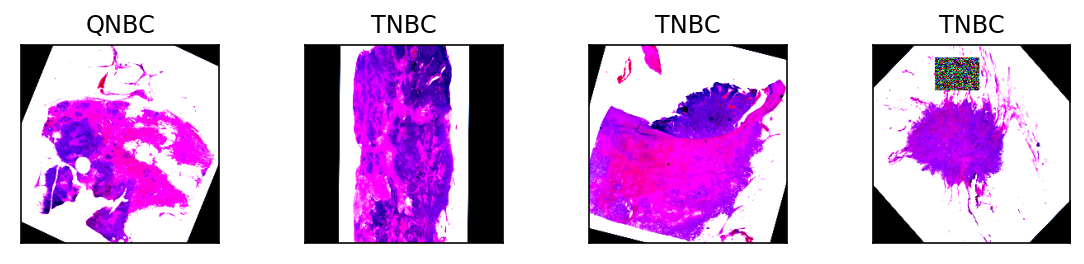

In [ ]:
#visualization
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display purposes

# plot the images in the batch
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(4):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
            nn.Conv2d(64, 192, 5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
            nn.Conv2d(192, 384, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        logit = self.classifier(x)
        return logit

In [ ]:
#EfficientNet
torch.backends.cudnn.benchmark = True
model = models.efficientnet_b1(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
n_inputs = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(n_inputs,2048),
    nn.SiLU(),
    nn.Dropout(0.2),
    nn.Linear(2048, len(classes))
)

model = model.to(device)
print(model.classifier)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=EfficientNet_B1_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Linear(in_features=1280, out_features=2048, bias=True)
  (1): SiLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=2048, out_features=2, bias=True)
)


In [ ]:
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
#class_weights=[0.3425,0.6525]
#class_weights=torch.tensor(class_weights,dtype=torch.float)

#criterion= nn.CrossEntropyLoss(weight=class_weights,label_smoothing=0.1)
criterion = criterion.to(device)
#optimizer = optim.AdamW(model.parameters(), lr=0.0000003)
optimizer = optim.AdamW(model.parameters(), lr=0.003)

In [ ]:
training_hist = {'accuracy':[],'loss':[]}
validation_hist= {'accuracy':[],'loss':[]}

In [ ]:
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
import time
import copy
from tqdm import tqdm


def train_model(model, criterion, optimizer, scheduler, num_epochs=125):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
        #for phase in ['train']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
                

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(data_load[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / data_sizes[phase]
            epoch_acc = running_corrects.double() / data_sizes[phase]
            
            if phase == 'train':
                training_hist['accuracy'].append(epoch_acc)
                training_hist['loss'].append(epoch_loss)
            elif phase == 'val':
                validation_hist['accuracy'].append(epoch_acc)
                validation_hist['loss'].append(epoch_loss)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
            #if phase == 'train' and epoch_acc > best_acc:

                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    #print('Best train Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model_ft = train_model(model, criterion, optimizer, exp_lr_scheduler,num_epochs=13)

Epoch 0/12
----------


100%|██████████| 4/4 [01:31<00:00, 22.82s/it]


train Loss: 1.5129 Acc: 0.4615


100%|██████████| 1/1 [00:10<00:00, 10.37s/it]


val Loss: 0.7880 Acc: 0.5000

Epoch 1/12
----------


100%|██████████| 4/4 [01:24<00:00, 21.20s/it]


train Loss: 0.7890 Acc: 0.5673


100%|██████████| 1/1 [00:10<00:00, 10.35s/it]


val Loss: 0.8640 Acc: 0.4375

Epoch 2/12
----------


100%|██████████| 4/4 [01:32<00:00, 23.11s/it]


train Loss: 0.6098 Acc: 0.6923


100%|██████████| 1/1 [00:10<00:00, 10.11s/it]


val Loss: 0.9574 Acc: 0.5000

Epoch 3/12
----------


100%|██████████| 4/4 [01:35<00:00, 23.75s/it]


train Loss: 0.5850 Acc: 0.7019


100%|██████████| 1/1 [00:10<00:00, 10.52s/it]


val Loss: 0.8174 Acc: 0.2500

Epoch 4/12
----------


100%|██████████| 4/4 [01:37<00:00, 24.33s/it]


train Loss: 0.5371 Acc: 0.7500


100%|██████████| 1/1 [00:10<00:00, 10.23s/it]


val Loss: 0.8686 Acc: 0.2500

Epoch 5/12
----------


100%|██████████| 4/4 [01:39<00:00, 24.94s/it]


train Loss: 0.5099 Acc: 0.7404


100%|██████████| 1/1 [00:10<00:00, 10.13s/it]


val Loss: 1.0038 Acc: 0.5000

Epoch 6/12
----------


100%|██████████| 4/4 [01:40<00:00, 25.12s/it]


train Loss: 0.4711 Acc: 0.8269


100%|██████████| 1/1 [00:10<00:00, 10.14s/it]


val Loss: 1.0351 Acc: 0.4375

Epoch 7/12
----------


100%|██████████| 4/4 [01:21<00:00, 20.27s/it]


train Loss: 0.4616 Acc: 0.8077


100%|██████████| 1/1 [00:10<00:00, 10.14s/it]


val Loss: 0.9306 Acc: 0.2500

Epoch 8/12
----------


100%|██████████| 4/4 [01:27<00:00, 21.82s/it]


train Loss: 0.4602 Acc: 0.8269


100%|██████████| 1/1 [00:10<00:00, 10.30s/it]


val Loss: 0.9540 Acc: 0.3125

Epoch 9/12
----------


100%|██████████| 4/4 [01:45<00:00, 26.32s/it]


train Loss: 0.4677 Acc: 0.8173


100%|██████████| 1/1 [00:10<00:00, 10.17s/it]


val Loss: 0.9885 Acc: 0.4375

Epoch 10/12
----------


  0%|          | 0/4 [01:13<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
loss_per_class=[]

def test(model):
  test_loss = 0.0
  class_correct = list(0. for i in range(len(classes)))
  class_total = list(0. for i in range(len(classes)))
  model.eval()

  #for data, target in tqdm(test_loader):
  for data, target in tqdm(val_loader):
      if torch.cuda.is_available(): 
          data, target = data.cuda(), target.cuda()
      with torch.no_grad():
        output = model(data)
        loss = criterion(output, target)
        loss_per_class.append(np.squeeze(loss.numpy()) if not torch.cuda.is_available() else np.squeeze(loss.cpu().numpy()))

      test_loss += loss.item()*data.size(0)
      _, pred = torch.max(output, 1)    
      correct_tensor = pred.eq(target.data.view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(correct_tensor.cpu().numpy())
      #idxs_mask = (pred == target).view(-1)
      #images=data.view(-1, n_pixel*n_pixel))
      #incorrect_examples.append(images[idxs_mask].numpy())
      if len(target) == 16:
        for i in range(16):
            label = target.data[i]
            #class_correct[label] += correct.item()
            class_correct[label] += correct[i].item()
            class_total[label] += 1

  #test_loss = test_loss/len(test_loader.dataset)
  test_loss = test_loss/len(val_loader.dataset)
  print('Test Loss: {:.6f}\n'.format(test_loss))

  for i in range(len(classes)):
      if class_total[i] > 0:
          print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
              classes[i], 100 * class_correct[i] / class_total[i],
              np.sum(class_correct[i]), np.sum(class_total[i])))
      else:
          print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

  print('\nTest Accuracy (Overall): {:.4f} ({}/{})'.format(
      100. * np.sum(class_correct) / np.sum(class_total),
      np.sum(class_correct), np.sum(class_total)))

In [ ]:
test(model_ft)
#Best train Acc: 0..817308

100%|██████████| 1/1 [00:11<00:00, 11.44s/it]

Test Loss: 0.624271

Test Accuracy of  QNBC: 87% ( 7/ 8)
Test Accuracy of  TNBC: 75% ( 6/ 8)

Test Accuracy (Overall): 81.2500 (13.0/16.0)


In [ ]:
test(model_ft)
#Best train Acc: 0.865385

100%|██████████| 1/1 [00:14<00:00, 14.04s/it]

Test Loss: 0.698519

Test Accuracy of  QNBC: 75% ( 6/ 8)
Test Accuracy of  TNBC: 62% ( 5/ 8)

Test Accuracy (Overall): 68.7500 (11.0/16.0)


In [ ]:
#Best train Acc: 0.7596
test(model_ft)

100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

Test Loss: 0.761827

Test Accuracy of  QNBC: 87% ( 7/ 8)
Test Accuracy of  TNBC: 50% ( 4/ 8)

Test Accuracy (Overall): 68.7500 (11.0/16.0)


In [ ]:
#Best train Acc:  0.7788
test(model_ft)

100%|██████████| 1/1 [00:04<00:00,  4.32s/it]

Test Loss: 0.777633

Test Accuracy of  QNBC: 62% ( 5/ 8)
Test Accuracy of  TNBC: 62% ( 5/ 8)

Test Accuracy (Overall): 62.5000 (10.0/16.0)


In [ ]:
#Best train Acc: Acc: 0.7885
test(model_ft)

100%|██████████| 1/1 [00:04<00:00,  4.40s/it]

Test Loss: 0.774350

Test Accuracy of  QNBC: 100% ( 8/ 8)
Test Accuracy of  TNBC: 62% ( 5/ 8)

Test Accuracy (Overall): 81.2500 (13.0/16.0)


In [ ]:
#Best train Acc: 0.817308
test(model_ft)

100%|██████████| 1/1 [00:04<00:00,  4.61s/it]

Test Loss: 0.767543

Test Accuracy of  QNBC: 62% ( 5/ 8)
Test Accuracy of  TNBC: 62% ( 5/ 8)

Test Accuracy (Overall): 62.5000 (10.0/16.0)


In [ ]:

test(model_ft)